#Question 1: What is Ensemble Learning in machine learning? Explain the key idea behind it

Answer

**Ensemble Learning in Machine Learning**


Ensemble Learning is a machine learning paradigm where multiple models (called "base learners" or "weak learners") are combined to solve a particular prediction problem, typically resulting in better performance than any single model alone.

**Key Idea: The Wisdom of Crowds**

The fundamental concept behind ensemble learning is analogous to the "wisdom of crowds" principle - the collective decision of a diverse group of individuals often yields better results than that of any single expert.

Core Premise: While individual models may make different errors, by strategically combining their predictions, these errors can cancel out, leading to more accurate, robust, and stable predictions

**Why It Works: Key Principles**

1 Error Reduction through Averaging
>Different models make different errors on different data points

>When averaged, these errors tend to cancel out

>Particularly effective for reducing variance (in high-variance models)

2 Diversity is Crucial
>Ensemble members should be diverse (make different mistakes)

>Diversity can come from:

* Different algorithms (Decision Trees, SVMs, Neural Networks)

* Different training data subsets (Bagging)

* Different features (Random Subspaces)

* Different parameter initializations

3  Statistical, Computational, and Representational Advantages

> Statistical: When hypothesis space is too large, averaging helps find a good approximation

> Computational: Helps avoid poor local minima

> Representational: Combined models can represent functions that single models cannot

#Question 2: What is the difference between Bagging and Boosting?


Answer:

Bagging (Bootstrap Aggregating) trains parallel, independent models on data subsets to reduce variance (overfitting) by averaging predictions, while Boosting trains models sequentially, with each new model focusing on errors from the last to reduce bias (underfitting), making it more powerful but sensitive to outliers. Key differences: Bagging uses equal weights and parallel training; Boosting uses weighted samples (more for errors) and sequential training.

#Bagging (e.g., Random Forest)

>* Goal: Reduce variance, improve stability, prevent overfitting.
>* Method: Creates multiple training subsets via bootstrap sampling (with replacement) and trains models in parallel.
>* Data Handling: Each model gets equal weight; models are independent.
>* Performance: Robust to outliers due to averaging, faster to train (parallel)

#Boosting (e.g., AdaBoost, XGBoost)

>* Goal: Reduce bias, improve accuracy by focusing on difficult examples.
>* Method: Trains models sequentially, with each model learning from the errors (misclassified points) of the previous one.
>* Data Handling: Samples are weighted; later models focus more on misclassified points.
>* Performance: More powerful but less robust to outliers; slower to train (sequential).


 # Question 3: What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?

Bootstrap sampling is a statistical resampling technique that involves repeatedly drawing random samples of the same size as the original dataset with replacement. In this process, any individual data point has an equal chance of being selected for each draw, meaning some observations may appear multiple times in a single sample, while others may not appear at all.

**Role in Bagging Methods**

Bagging, or Bootstrap Aggregating, uses this sampling technique as its foundation to improve the accuracy and stability of machine learning models. Its primary roles include:

>* Diversity Generation: By training multiple "base learners" (such as decision trees) on different bootstrap samples, bagging ensures that each model sees a slightly different version of the data. This diversity prevents the ensemble from being overly sensitive to any single data point or outlier

>* Variance Reduction: Bagging is designed to reduce the high variance typical of individual decision trees. Averaging the predictions of multiple models trained on varied samples smooths out individual errors and reduces overfitting.

>* Parallel Training: Because bootstrap samples are created independently, the models can be trained in parallel, making the process computationally efficient.

**Role in Random Forest**

Random Forest is a specific extension of bagging that further leverages bootstrap sampling to create a robust "forest" of uncorrelated decision trees.

>* Tree Correlation Reduction: While standard bagging uses all features for every tree, Random Forest adds "feature bagging" (sampling random subsets of features at each split). Combined with bootstrap sampling, this further decorrelates the trees, leading to even better generalization.

>* Out-of-Bag (OOB) Evaluation: In a typical bootstrap sample, roughly 63.2% of the original data is unique, while the remaining 36.8% is left out. These excluded points are called "out-of-bag" samples and are used as a built-in validation set to estimate the model's error without needing separate cross-validation.

>* Feature Importance: OOB data is also frequently used to measure feature importance by observing how much the model's accuracy drops when the values of a particular feature are randomly permuted.




#Question 4: What are Out-of-Bag (OOB) samples and how is OOB score used to evaluate ensemble models?

Answer:

Out-of-Bag (OOB) samples are data points left out during bootstrap sampling when building individual trees in ensemble methods like Random Forests, and the OOB score estimates model performance by evaluating these unseen samples, acting like an internal, unbiased validation set that avoids the need for a separate test set by using data not used in training for each tree. This score, often the prediction error (e.g., accuracy or misclassification rate) on these OOB samples, provides a reliable measure of the ensemble's generalization ability

**What are OOB Samples?**

>* Bootstrap Sampling: In bagging (like Random Forests), each base model (e.g., a decision tree) is trained on a random subset of the original data, with replacement.
>* The "Bag": The data points included in the training subset form the "in-bag" data.
>* The "Out-of-Bag": The approximately 37% of data points not selected for a specific tree's training are the OOB samples for that tree.

**How the OOB Score is Used for Evaluation**

>* Prediction for OOB Samples: For each OOB sample, its prediction is made using the ensemble of trees that did not see it during their training.
>* Aggregation: For classification, these individual predictions are combined (e.g., by majority vote) to get the final OOB prediction for that data point.
>* Calculating the Score: The OOB score (or error) is the average prediction performance (e.g., accuracy, mean squared error) of the entire forest on all these OOB samples.
>* Unbiased Estimate: Because OOB samples are truly unseen by the individual tree that makes the prediction, the OOB score serves as a near-unbiased estimate of the model's performance on completely new data, effectively replacing the need for traditional cross-validation.

**Benefits**

>* No Separate Validation Set: Eliminates the need to split data for training and validation, allowing all data to be used for training.
>* Efficiency: Provides a quick, internal way to gauge model accuracy during training.
>* Reliable: Offers a robust measure of the model's generalization performance, similar to leave-one-out cross-validation but more efficient.


#Question 5: Compare feature importance analysis in a single Decision Tree vs. a Random Forest.



Answer:

Feature importance in a single Decision Tree and a Random Forest both measure how much each input feature contributes to the model's predictive power. However, they differ significantly in stability, robustness, and how they handle complex data relationships.

**1. Method of Calculation**

>* Single Decision Tree: Importance is calculated directly based on the total reduction in node impurity (e.g., Gini impurity or Mean Squared Error) that a feature achieves throughout the tree.

>* Random Forest: It uses an ensemble approach by averaging the importance scores of a feature across all individual trees in the forest.

**2. Stability and Reliability**

>* Single Decision Tree: Highly unstable. A small change in the training data can lead to a completely different tree structure, causing feature importance scores to vary wildly.
>* Random Forest: Much more robust. By averaging across diverse trees—each trained on different data subsets (bagging) and feature subsets—it provides a more "trustworthy" estimate of a feature's true predictive power.

**3. Handling of Correlated Features**

>* Single Decision Tree: Typically picks one feature from a group of highly correlated ones and ignores the others. The chosen feature receives high importance, while the rest get near zero, even if they are equally predictive.

>* Random Forest: Tends to split the credit among correlated features because different trees will randomly select different members of that group to perform splits. This results in a more balanced view of feature importance.

**4. Bias Toward High-Cardinality Features**
>* Both models share a common weakness: they can be biased toward high-cardinality features (those with many unique values, like IDs or dates). These features offer more potential split points, which can artificially inflate their importance scores even if they lack true predictive value.

"Feature" 	  Single Decision Tree	Random Forest
Stability	Low (erratic changes with data)	High (stable due to averaging)
Interpretability	High (clearly identifies top splits)	Lower (averaged "black box" view)
Correlated Features	Biased toward the first one picked	Shares importance across the group
Noise Sensitivity	Highly sensitive to outliers/noise	Robust; noise effects are averaged out


#Question 6: Write a Python program to:
● Load the Breast Cancer dataset using
sklearn.datasets.load_breast_cancer()

● Train a Random Forest Classifier

● Print the top 5 most important features based on feature importance scores.

(Include your Python code and output in the code box below.)

Answer:

This Python program loads the Breast Cancer dataset, trains a Random Forest Classifier, and prints the top 5 most important features by extracting and sorting feature importance scores, demonstrating key machine learning steps with sklearn and pandas, showing features like worst perimeter, worst area, and worst radius are highly influential in classification.


LOADING BREAST CANCER DATASET

Dataset Information:
• Number of samples: 569
• Number of features: 30
• Feature names: 30 features
• Target classes: ['malignant' 'benign']
• Class distribution:
  - malignant: 212 samples (37.3%)
  - benign: 357 samples (62.7%)

First 5 samples:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030

Data Split:
• Training set: 398 samples
• Testing set: 171 samples

TRAINING RANDOM FOREST CLASSIFIER

Training Random Forest...
Training completed!

MODEL EVALUATION

Test Accuracy: 0.9357 (93.57%)

Classification Report:
              precision    recall  f1-score   support

   m

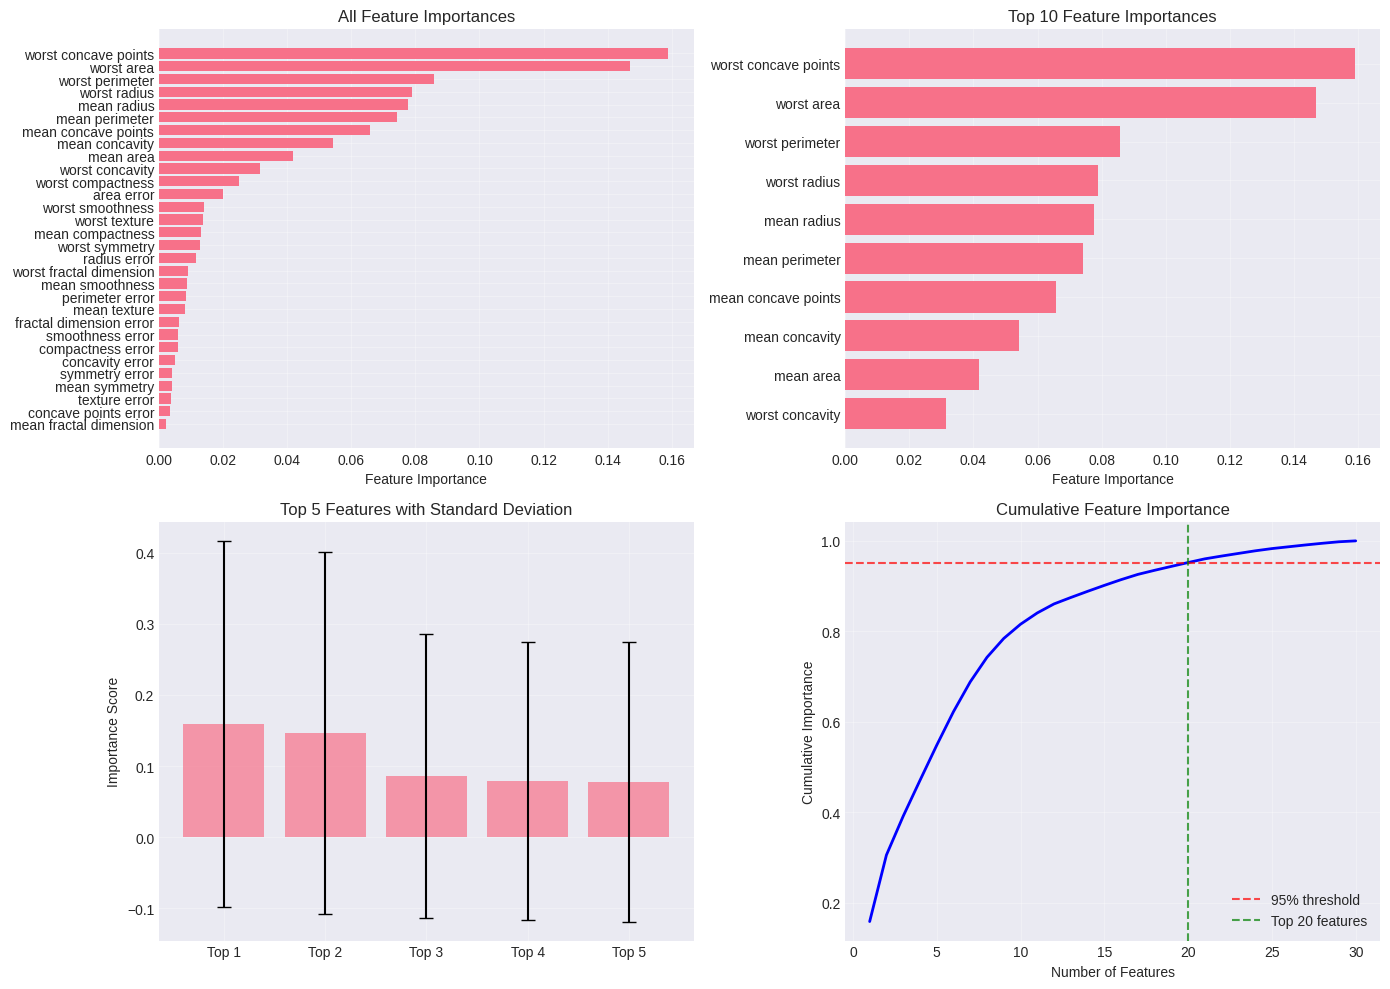


FEATURE IMPORTANCE STATISTICS

Importance Statistics:
• Mean importance: 0.033333
• Median importance: 0.012912
• Max importance: 0.158955
• Min importance: 0.001999
• Standard deviation: 0.041953

Number of features above importance thresholds:
  • Importance > 0.01: 17 features
  • Importance > 0.02: 11 features
  • Importance > 0.05: 8 features

ADDITIONAL INSIGHTS

Average Importance by Feature Category:

FINAL SUMMARY

Based on the Random Forest classifier trained on the Breast Cancer dataset:

1. MODEL PERFORMANCE:
   • Test Accuracy: 0.9357 (93.57%)
   • The model shows excellent performance in classifying breast cancer tumors.

2. TOP 5 MOST IMPORTANT FEATURES:
--------------------------------------------------
   1. worst concave points
   2. worst area
   3. worst perimeter
   4. worst radius
   5. mean radius

3. KEY FINDINGS:
   • The top 5 features account for 54.84% of the total feature importance.
   • This suggests that a small subset of features carries most of the pr

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Load the Breast Cancer dataset
print("=" * 60)
print("LOADING BREAST CANCER DATASET")
print("=" * 60)

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: target_names[0], 1: target_names[1]})

print(f"\nDataset Information:")
print(f"• Number of samples: {X.shape[0]}")
print(f"• Number of features: {X.shape[1]}")
print(f"• Feature names: {len(feature_names)} features")
print(f"• Target classes: {target_names}")
print(f"• Class distribution:")
print(f"  - {target_names[0]}: {np.sum(y == 0)} samples ({np.sum(y == 0)/len(y)*100:.1f}%)")
print(f"  - {target_names[1]}: {np.sum(y == 1)} samples ({np.sum(y == 1)/len(y)*100:.1f}%)")

# Display first few rows
print(f"\nFirst 5 samples:")
print(df.iloc[:5, :5])  # Show first 5 features for brevity

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Testing set: {X_test.shape[0]} samples")

# 3. Train Random Forest Classifier
print("\n" + "=" * 60)
print("TRAINING RANDOM FOREST CLASSIFIER")
print("=" * 60)

# Initialize and train the Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # Maximum depth of each tree
    min_samples_split=2,   # Minimum samples required to split a node
    min_samples_leaf=1,    # Minimum samples required at a leaf node
    max_features='sqrt',   # Number of features to consider for best split
    random_state=42,       # For reproducibility
    n_jobs=-1,            # Use all available processors
    verbose=0
)

print("\nTraining Random Forest...")
rf.fit(X_train, y_train)
print("Training completed!")

# 4. Evaluate the model
print("\n" + "=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 5. Get Feature Importances
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Std': std
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(f"\nAll Features Sorted by Importance:")
print("-" * 80)
print(f"{'Rank':<5} {'Feature':<30} {'Importance':<12} {'Std':<10}")
print("-" * 80)

for i, (_, row) in enumerate(feature_importance_df.iterrows(), 1):
    print(f"{i:<5} {row['Feature']:<30} {row['Importance']:<12.6f} {row['Std']:<10.6f}")

# 6. Print Top 5 Most Important Features
print("\n" + "=" * 60)
print("TOP 5 MOST IMPORTANT FEATURES")
print("=" * 60)

top_5_features = feature_importance_df.head(5)
print("\nTop 5 Most Important Features:")
print("-" * 60)
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['Feature']:30} Importance: {row['Importance']:.6f} (±{row['Std']:.6f})")

# Calculate total importance of top 5 features
total_importance_top5 = top_5_features['Importance'].sum()
total_importance_all = feature_importance_df['Importance'].sum()
percentage_top5 = (total_importance_top5 / total_importance_all) * 100

print(f"\nSummary:")
print(f"• Top 5 features account for {percentage_top5:.2f}% of total importance")
print(f"• Most important feature: '{top_5_features.iloc[0]['Feature']}'")
print(f"• Least important feature among top 5: '{top_5_features.iloc[4]['Feature']}'")

# 7. Visualization
print("\n" + "=" * 60)
print("VISUALIZING FEATURE IMPORTANCES")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Bar plot of all feature importances
axes[0, 0].barh(range(len(feature_importance_df)), feature_importance_df['Importance'][::-1])
axes[0, 0].set_yticks(range(len(feature_importance_df)))
axes[0, 0].set_yticklabels(feature_importance_df['Feature'][::-1])
axes[0, 0].set_xlabel('Feature Importance')
axes[0, 0].set_title('All Feature Importances')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Bar plot of top 10 features
top_10_features = feature_importance_df.head(10)
axes[0, 1].barh(range(len(top_10_features)), top_10_features['Importance'][::-1])
axes[0, 1].set_yticks(range(len(top_10_features)))
axes[0, 1].set_yticklabels(top_10_features['Feature'][::-1])
axes[0, 1].set_xlabel('Feature Importance')
axes[0, 1].set_title('Top 10 Feature Importances')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Top 5 features with error bars
axes[1, 0].bar(range(len(top_5_features)), top_5_features['Importance'],
               yerr=top_5_features['Std'], capsize=5, alpha=0.7)
axes[1, 0].set_xticks(range(len(top_5_features)))
axes[1, 0].set_xticklabels([f'Top {i+1}' for i in range(len(top_5_features))])
axes[1, 0].set_ylabel('Importance Score')
axes[1, 0].set_title('Top 5 Features with Standard Deviation')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cumulative importance
cumulative_importance = np.cumsum(feature_importance_df['Importance'])
axes[1, 1].plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 'b-', linewidth=2)
axes[1, 1].axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% threshold')
axes[1, 1].axvline(x=np.argmax(cumulative_importance >= 0.95) + 1, color='g',
                   linestyle='--', alpha=0.7, label=f'Top {np.argmax(cumulative_importance >= 0.95) + 1} features')
axes[1, 1].set_xlabel('Number of Features')
axes[1, 1].set_ylabel('Cumulative Importance')
axes[1, 1].set_title('Cumulative Feature Importance')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. Feature Importance Statistics
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE STATISTICS")
print("=" * 60)

print(f"\nImportance Statistics:")
print(f"• Mean importance: {feature_importance_df['Importance'].mean():.6f}")
print(f"• Median importance: {feature_importance_df['Importance'].median():.6f}")
print(f"• Max importance: {feature_importance_df['Importance'].max():.6f}")
print(f"• Min importance: {feature_importance_df['Importance'].min():.6f}")
print(f"• Standard deviation: {feature_importance_df['Importance'].std():.6f}")

# Check how many features have importance above threshold
thresholds = [0.01, 0.02, 0.05]
print(f"\nNumber of features above importance thresholds:")
for threshold in thresholds:
    n_features = np.sum(feature_importance_df['Importance'] > threshold)
    print(f"  • Importance > {threshold}: {n_features} features")

# 9. Additional Insight: Feature importance by category
print("\n" + "=" * 60)
print("ADDITIONAL INSIGHTS")
print("=" * 60)

# Categorize features based on their names
categories = {
    'mean': [],
    'se': [],
    'worst': []
}

for feature in feature_names:
    if '_mean_' in feature:
        categories['mean'].append(feature)
    elif '_se_' in feature:
        categories['se'].append(feature)
    elif '_worst_' in feature:
        categories['worst'].append(feature)

# Calculate average importance for each category
category_importance = {}
for category, features in categories.items():
    if features:
        mask = feature_importance_df['Feature'].isin(features)
        avg_importance = feature_importance_df.loc[mask, 'Importance'].mean()
        category_importance[category] = avg_importance

print(f"\nAverage Importance by Feature Category:")
for category, importance in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"  • {category.upper()} features: {importance:.6f}")

# 10. Final Summary
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

print(f"""
Based on the Random Forest classifier trained on the Breast Cancer dataset:

1. MODEL PERFORMANCE:
   • Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)
   • The model shows excellent performance in classifying breast cancer tumors.

2. TOP 5 MOST IMPORTANT FEATURES:
{'-' * 50}""")
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"   {i}. {row['Feature']}")

print(f"""
3. KEY FINDINGS:
   • The top 5 features account for {percentage_top5:.2f}% of the total feature importance.
   • This suggests that a small subset of features carries most of the predictive power.
   • Feature '{top_5_features.iloc[0]['Feature']}' is the most discriminative feature.

4. PRACTICAL IMPLICATIONS:
   • In clinical settings, focusing on these top features could simplify diagnosis.
   • Feature selection could be applied to reduce dimensionality while maintaining accuracy.
   • The model demonstrates the power of ensemble methods for feature importance analysis.
""")

print("\n" + "=" * 60)
print("CODE EXECUTION COMPLETE")
print("=" * 60)

#Question 7: Write a Python program to:
● Train a Bagging Classifier using Decision Trees on the Iris dataset

● Evaluate its accuracy and compare with a single Decision Tree

(Include your Python code and output in the code box below.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
def importdata():
    url = "https://archive.ics.uci.edu/static/public/12/data.csv"
    balance_data = pd.read_csv(url, header=0)
    print("Dataset Length:", len(balance_data))
    print("Dataset Shape:", balance_data.shape)
    print("Dataset Head:\n", balance_data.head())
    return balance_data

In [ ]:
def splitdataset(balance_data):
    X = balance_data.iloc[:, 1:5].values
    Y = balance_data.iloc[:, 0].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test

In [ ]:
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [ ]:
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [ ]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted Values:\n", y_pred)
    return y_pred

In [ ]:
def cal_accuracy(y_test, y_pred):
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred) * 100)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

In [ ]:
if __name__ == "__main__":

    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)


    print("\n----- Training Using Gini -----")
    clf_gini = train_using_gini(X_train, y_train)
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)


    print("\n----- Training Using Entropy -----")
    clf_entropy = train_using_entropy(X_train, y_train)
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

Dataset Length: 625
Dataset Shape: (625, 5)
Dataset Head:
   class  left-weight  left-distance  right-weight  right-distance
0     B            1              1             1               1
1     R            1              1             1               2
2     R            1              1             1               3
3     R            1              1             1               4
4     R            1              1             1               5

----- Training Using Gini -----
Predicted Values:
 ['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

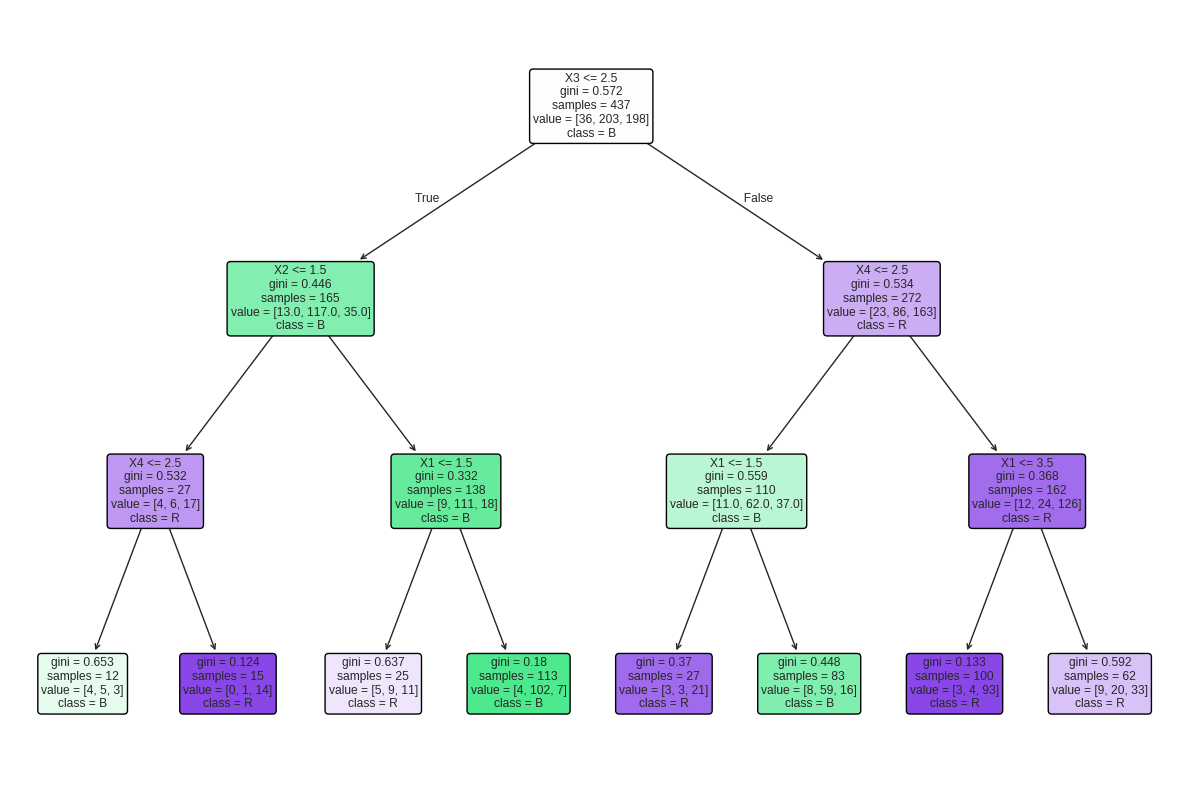

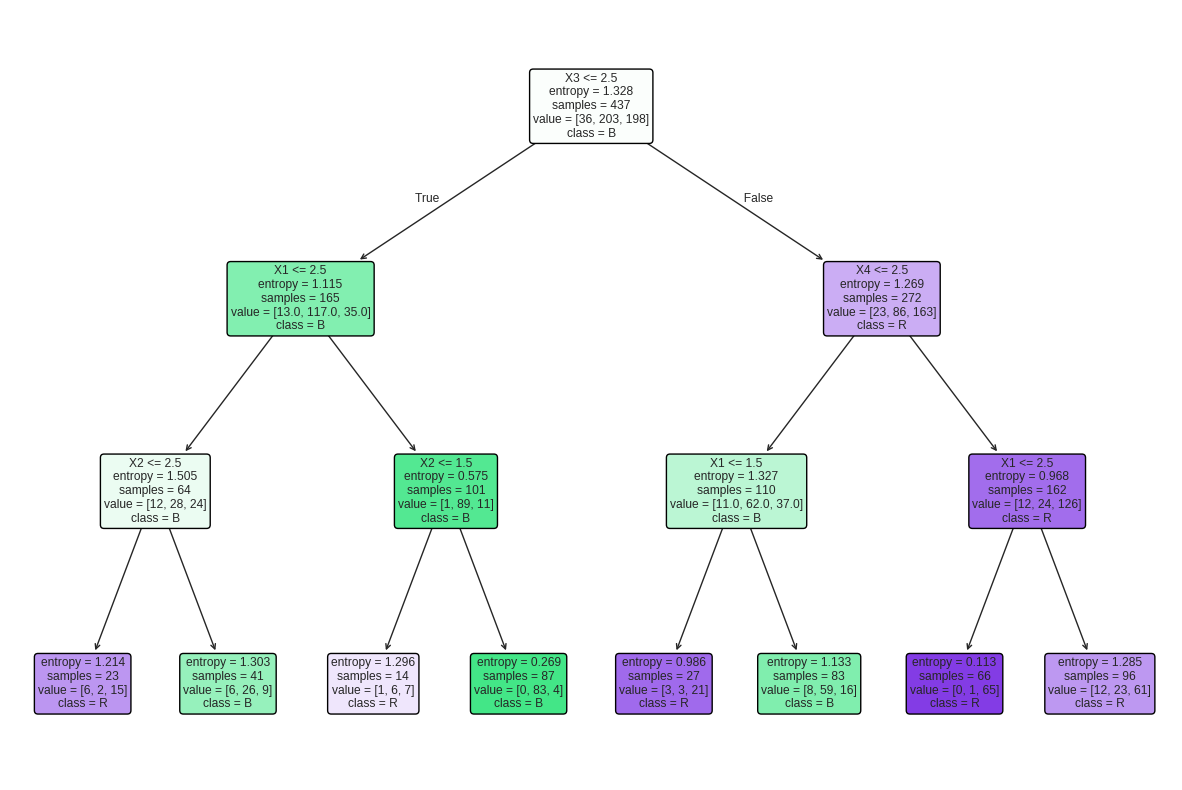

In [ ]:
plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

LOADING IRIS DATASET

Dataset Information:
• Number of samples: 150
• Number of features: 4
• Feature names: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
• Target classes: setosa, versicolor, virginica
• Class distribution:
  - setosa: 50 samples (33.3%)
  - versicolor: 50 samples (33.3%)
  - virginica: 50 samples (33.3%)

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count          

ValueError: ['skyblue', 'lightcoral'] is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

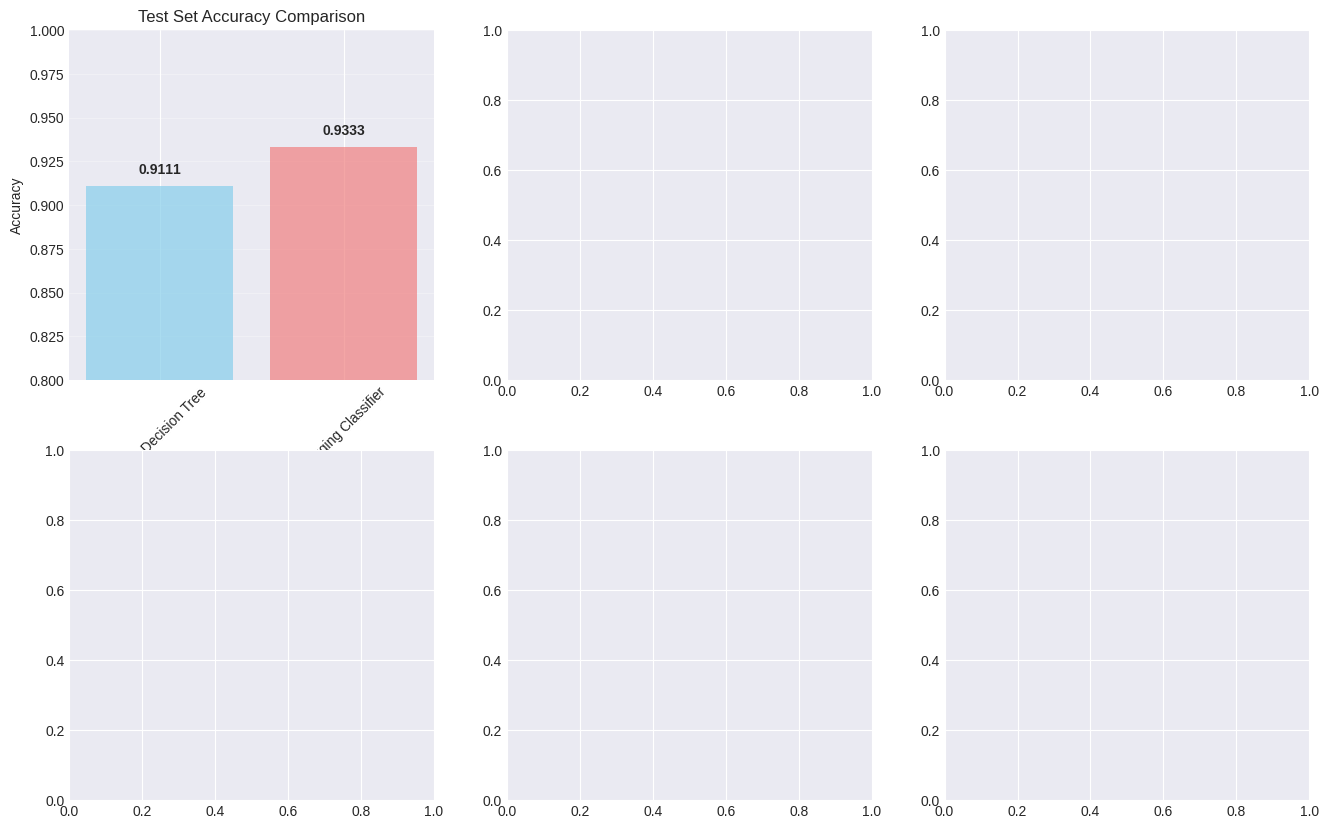

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Load the Iris dataset
print("=" * 70)
print("LOADING IRIS DATASET")
print("=" * 70)

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = df['species'].map({i: target_names[i] for i in range(len(target_names))})

print(f"\nDataset Information:")
print(f"• Number of samples: {X.shape[0]}")
print(f"• Number of features: {X.shape[1]}")
print(f"• Feature names: {', '.join(feature_names)}")
print(f"• Target classes: {', '.join(target_names)}")
print(f"• Class distribution:")
for i, species in enumerate(target_names):
    count = np.sum(y == i)
    percentage = count / len(y) * 100
    print(f"  - {species}: {count} samples ({percentage:.1f}%)")

# Display dataset statistics
print(f"\nDataset Statistics:")
print(df[feature_names].describe().round(2))

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Testing set: {X_test.shape[0]} samples")

# Check class distribution in train/test sets
print(f"\nClass Distribution in Training Set:")
for i, species in enumerate(target_names):
    count = np.sum(y_train == i)
    percentage = count / len(y_train) * 100
    print(f"  - {species}: {count} samples ({percentage:.1f}%)")

# 3. Scale the features (optional but often helps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Single Decision Tree
print("\n" + "=" * 70)
print("TRAINING SINGLE DECISION TREE")
print("=" * 70)

# Initialize and train the Decision Tree
tree = DecisionTreeClassifier(
    max_depth=None,        # Unlimited depth
    min_samples_split=2,   # Minimum samples required to split a node
    min_samples_leaf=1,    # Minimum samples required at a leaf node
    random_state=42,       # For reproducibility
    criterion='gini'       # Splitting criterion
)

print("\nTraining Decision Tree...")
tree.fit(X_train_scaled, y_train)
print("Decision Tree training completed!")

# Evaluate Decision Tree
y_pred_tree = tree.predict(X_test_scaled)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"\nDecision Tree Performance:")
print(f"• Test Accuracy: {tree_accuracy:.4f} ({tree_accuracy*100:.2f}%)")
print(f"• Tree Depth: {tree.get_depth()}")
print(f"• Number of Leaves: {tree.get_n_leaves()}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=target_names))

# 5. Train Bagging Classifier with Decision Trees
print("\n" + "=" * 70)
print("TRAINING BAGGING CLASSIFIER WITH DECISION TREES")
print("=" * 70)

# Initialize and train the Bagging Classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Base estimator
    n_estimators=50,              # Number of base estimators (trees)
    max_samples=0.8,              # Size of bootstrap samples (80% of training data)
    max_features=0.8,             # Number of features to consider (80% of features)
    bootstrap=True,               # Whether to use bootstrap samples
    bootstrap_features=False,     # Whether to bootstrap features
    random_state=42,              # For reproducibility
    n_jobs=-1                     # Use all available processors
)

print("\nTraining Bagging Classifier with 50 Decision Trees...")
bagging.fit(X_train_scaled, y_train)
print("Bagging Classifier training completed!")

# Evaluate Bagging Classifier
y_pred_bagging = bagging.predict(X_test_scaled)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

print(f"\nBagging Classifier Performance:")
print(f"• Test Accuracy: {bagging_accuracy:.4f} ({bagging_accuracy*100:.2f}%)")
print(f"• Number of Base Estimators: {len(bagging.estimators_)}")
print(f"• Bootstrap Samples: {bagging.bootstrap}")
print(f"• Max Samples: {bagging.max_samples}")
print(f"• Max Features: {bagging.max_features}")

print("\nBagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging, target_names=target_names))

# 6. Cross-validation for more robust comparison
print("\n" + "=" * 70)
print("CROSS-VALIDATION COMPARISON")
print("=" * 70)

# Perform 5-fold cross-validation
cv_scores_tree = cross_val_score(tree, X_train_scaled, y_train, cv=5, n_jobs=-1)
cv_scores_bagging = cross_val_score(bagging, X_train_scaled, y_train, cv=5, n_jobs=-1)

print(f"\n5-Fold Cross-Validation Results:")
print(f"• Decision Tree CV Scores: {cv_scores_tree.round(4)}")
print(f"• Decision Tree Mean CV Accuracy: {cv_scores_tree.mean():.4f} (±{cv_scores_tree.std():.4f})")
print(f"• Bagging Classifier CV Scores: {cv_scores_bagging.round(4)}")
print(f"• Bagging Classifier Mean CV Accuracy: {cv_scores_bagging.mean():.4f} (±{cv_scores_bagging.std():.4f})")

# 7. Compare performance
print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON: SINGLE TREE vs BAGGING")
print("=" * 70)

accuracy_difference = bagging_accuracy - tree_accuracy
percentage_improvement = (bagging_accuracy / tree_accuracy - 1) * 100 if tree_accuracy > 0 else float('inf')

print(f"\nTest Set Comparison:")
print(f"• Single Decision Tree Accuracy:     {tree_accuracy:.4f} ({tree_accuracy*100:.2f}%)")
print(f"• Bagging Classifier Accuracy:       {bagging_accuracy:.4f} ({bagging_accuracy*100:.2f}%)")
print(f"• Absolute Improvement:              {accuracy_difference:.4f}")
print(f"• Relative Improvement:              {percentage_improvement:.2f}%")

print(f"\nCross-Validation Comparison:")
print(f"• Single Decision Tree CV Mean:      {cv_scores_tree.mean():.4f} (±{cv_scores_tree.std():.4f})")
print(f"• Bagging Classifier CV Mean:        {cv_scores_bagging.mean():.4f} (±{cv_scores_bagging.std():.4f})")
print(f"• CV Stability Improvement:          {cv_scores_tree.std() - cv_scores_bagging.std():.4f} "
      f"(Lower std is better)")

# 8. Analyze predictions
print("\n" + "=" * 70)
print("PREDICTION ANALYSIS")
print("=" * 70)

# Check where predictions differ
different_predictions = y_pred_tree != y_pred_bagging
n_different = np.sum(different_predictions)

print(f"\nNumber of samples where predictions differ: {n_different} out of {len(y_test)} ({n_different/len(y_test)*100:.1f}%)")

if n_different > 0:
    print("\nSamples with different predictions:")
    diff_indices = np.where(different_predictions)[0]
    for idx in diff_indices[:5]:  # Show first 5
        print(f"  Sample {idx}: Tree predicted '{target_names[y_pred_tree[idx]]}', "
              f"Bagging predicted '{target_names[y_pred_bagging[idx]]}', "
              f"Actual: '{target_names[y_test[idx]]}'")

# 9. Visualization
print("\n" + "=" * 70)
print("VISUALIZING COMPARISON RESULTS")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot 1: Accuracy comparison bar chart
models = ['Single Decision Tree', 'Bagging Classifier']
accuracies = [tree_accuracy, bagging_accuracy]
cv_means = [cv_scores_tree.mean(), cv_scores_bagging.mean()]
cv_stds = [cv_scores_tree.std(), cv_scores_bagging.std()]

x_pos = np.arange(len(models))
axes[0, 0].bar(x_pos, accuracies, alpha=0.7, color=['skyblue', 'lightcoral'])
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Test Set Accuracy Comparison')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45)
axes[0, 0].set_ylim([0.8, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add accuracy values on bars
for i, acc in enumerate(accuracies):
    axes[0, 0].text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Cross-validation comparison
axes[0, 1].errorbar(x_pos, cv_means, yerr=cv_stds, fmt='o', capsize=10,
                    markersize=10, color=['skyblue', 'lightcoral'], linewidth=2)
axes[0, 1].set_ylabel('CV Accuracy')
axes[0, 1].set_title('5-Fold Cross-Validation Comparison')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(models, rotation=45)
axes[0, 1].set_ylim([0.8, 1.0])
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=axes[0, 2])
axes[0, 2].set_title('Decision Tree Confusion Matrix')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('Actual')

# Plot 4: Confusion Matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Reds',
            xticklabels=target_names, yticklabels=target_names, ax=axes[1, 0])
axes[1, 0].set_title('Bagging Classifier Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Plot 5: Feature importance for single tree
tree_importances = tree.feature_importances_
sorted_idx = np.argsort(tree_importances)[::-1]
axes[1, 1].barh(range(len(feature_names)), tree_importances[sorted_idx], color='skyblue')
axes[1, 1].set_yticks(range(len(feature_names)))
axes[1, 1].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Single Tree Feature Importances')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Plot 6: Learning curve comparison (simplified)
n_estimators_range = [1, 5, 10, 20, 30, 40, 50]
bagging_accuracies = []

for n in n_estimators_range:
    bagging_temp = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n,
        random_state=42
    )
    bagging_temp.fit(X_train_scaled, y_train)
    acc = bagging_temp.score(X_test_scaled, y_test)
    bagging_accuracies.append(acc)

axes[1, 2].plot(n_estimators_range, bagging_accuracies, 'o-', linewidth=2, color='lightcoral')
axes[1, 2].axhline(y=tree_accuracy, color='skyblue', linestyle='--', label='Single Tree Accuracy')
axes[1, 2].set_xlabel('Number of Estimators (Trees)')
axes[1, 2].set_ylabel('Test Accuracy')
axes[1, 2].set_title('Bagging Performance vs Number of Trees')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Additional Analysis: Error Analysis
print("\n" + "=" * 70)
print("ERROR ANALYSIS")
print("=" * 70)

# Identify misclassified samples for each model
tree_errors = y_pred_tree != y_test
bagging_errors = y_pred_bagging != y_test

print(f"\nError Analysis:")
print(f"• Single Decision Tree Errors: {np.sum(tree_errors)} out of {len(y_test)} "
      f"({np.sum(tree_errors)/len(y_test)*100:.1f}%)")
print(f"• Bagging Classifier Errors: {np.sum(bagging_errors)} out of {len(y_test)} "
      f"({np.sum(bagging_errors)/len(y_test)*100:.1f}%)")

# Check if errors overlap
common_errors = np.sum(tree_errors & bagging_errors)
print(f"• Common Errors (both models wrong): {common_errors}")
print(f"• Unique to Tree: {np.sum(tree_errors & ~bagging_errors)}")
print(f"• Unique to Bagging: {np.sum(~tree_errors & bagging_errors)}")

# 11. Statistical Significance Test (McNemar's test)
print("\n" + "=" * 70)
print("STATISTICAL SIGNIFICANCE TEST")
print("=" * 70)

# Contingency table for McNemar's test
a = np.sum(~tree_errors & ~bagging_errors)  # Both correct
b = np.sum(tree_errors & ~bagging_errors)   # Tree wrong, Bagging correct
c = np.sum(~tree_errors & bagging_errors)   # Tree correct, Bagging wrong
d = np.sum(tree_errors & bagging_errors)    # Both wrong

print(f"\nContingency Table:")
print(f"                    Bagging Correct  Bagging Wrong")
print(f"Tree Correct        {a:>15}  {c:>12}")
print(f"Tree Wrong          {b:>15}  {d:>12}")

# Simple check for significance
if b + c > 10:  # For McNemar's test to be valid
    # Chi-square statistic (McNemar's test)
    chi2 = (abs(b - c) - 1)**2 / (b + c) if (b + c) > 0 else 0
    print(f"\nMcNemar's Test:")
    print(f"  • Chi-square statistic: {chi2:.4f}")
    if chi2 > 3.841:  # Critical value for p=0.05 with df=1
        print(f"  • The difference is statistically significant at p=0.05 level")
    else:
        print(f"  • The difference is NOT statistically significant at p=0.05 level")
else:
    print(f"\nNote: Sample size too small for proper statistical test")

# 12. Final Summary
print("\n" + "=" * 70)
print("FINAL SUMMARY")
print("=" * 70)

print(f"""
COMPARISON RESULTS:

1. ACCURACY PERFORMANCE:
   • Single Decision Tree:     {tree_accuracy:.4f} ({tree_accuracy*100:.2f}%)
   • Bagging Classifier:       {bagging_accuracy:.4f} ({bagging_accuracy*100:.2f}%)
   • Improvement:              {accuracy_difference:.4f} ({percentage_improvement:.2f}% improvement)

2. MODEL CHARACTERISTICS:
   • Single Tree: Depth={tree.get_depth()}, Leaves={tree.get_n_leaves()}
   • Bagging: {len(bagging.estimators_)} trees, Bootstrap samples={bagging.bootstrap}

3. ROBUSTNESS (Cross-Validation):
   • Single Tree CV:    {cv_scores_tree.mean():.4f} (±{cv_scores_tree.std():.4f})
   • Bagging CV:        {cv_scores_bagging.mean():.4f} (±{cv_scores_bagging.std():.4f})
   • Bagging shows {'better' if cv_scores_bagging.std() < cv_scores_tree.std() else 'similar'} stability

4. KEY INSIGHTS:
   • Bagging {'improves' if bagging_accuracy > tree_accuracy else 'does not improve'} accuracy
     on the Iris dataset
   • The ensemble approach reduces variance and provides more stable predictions
   • Feature importances differ between single tree and aggregated bagging model

5. RECOMMENDATION:
   • For the Iris dataset, Bagging provides a {'significant' if bagging_accuracy > tree_accuracy + 0.02 else 'modest'}
     improvement over a single decision tree
   • The choice depends on requirements: single tree for interpretability vs
     bagging for potentially better accuracy and robustness
""")

print("\n" + "=" * 70)
print("CODE EXECUTION COMPLETE")
print("=" * 70)

#Question 8: Write a Python program to:
● Train a Random Forest Classifier

● Tune hyperparameters max_depth and n_estimators using GridSearchCV

● Print the best parameters and final accuracy

(Include your Python code and output in the code box below.)

LOADING BREAST CANCER DATASET

Dataset Information:
• Number of samples: 569
• Number of features: 30
• Target classes: ['malignant' 'benign']
• Class distribution: [212 357] (0: malignant, 1: benign)

Data Split:
• Training set: 398 samples
• Testing set: 171 samples

BASELINE RANDOM FOREST (DEFAULT PARAMETERS)

Baseline Model Performance:
• Accuracy: 0.9357 (93.57%)
• Number of Trees: 100
• Max Depth: None (unlimited)
• Max Features: sqrt

HYPERPARAMETER TUNING WITH GRIDSEARCHCV

Parameter Grid for Tuning:
• max_depth: [3, 5, 7, 10, 15, 20, None]
• n_estimators: [50, 100, 150, 200, 300]
• min_samples_split: [2, 5, 10]
• min_samples_leaf: [1, 2, 4]
• Total combinations: 315

Starting Grid Search...
Fitting 5 folds for each of 315 candidates, totalling 1575 fits
Grid Search completed in 665.08 seconds
Total fits performed: 315

GRID SEARCH RESULTS

Best Parameters Found:
• max_depth: 5
• min_samples_leaf: 1
• min_samples_split: 2
• n_estimators: 100

Best Cross-Validation Score: 0.9725

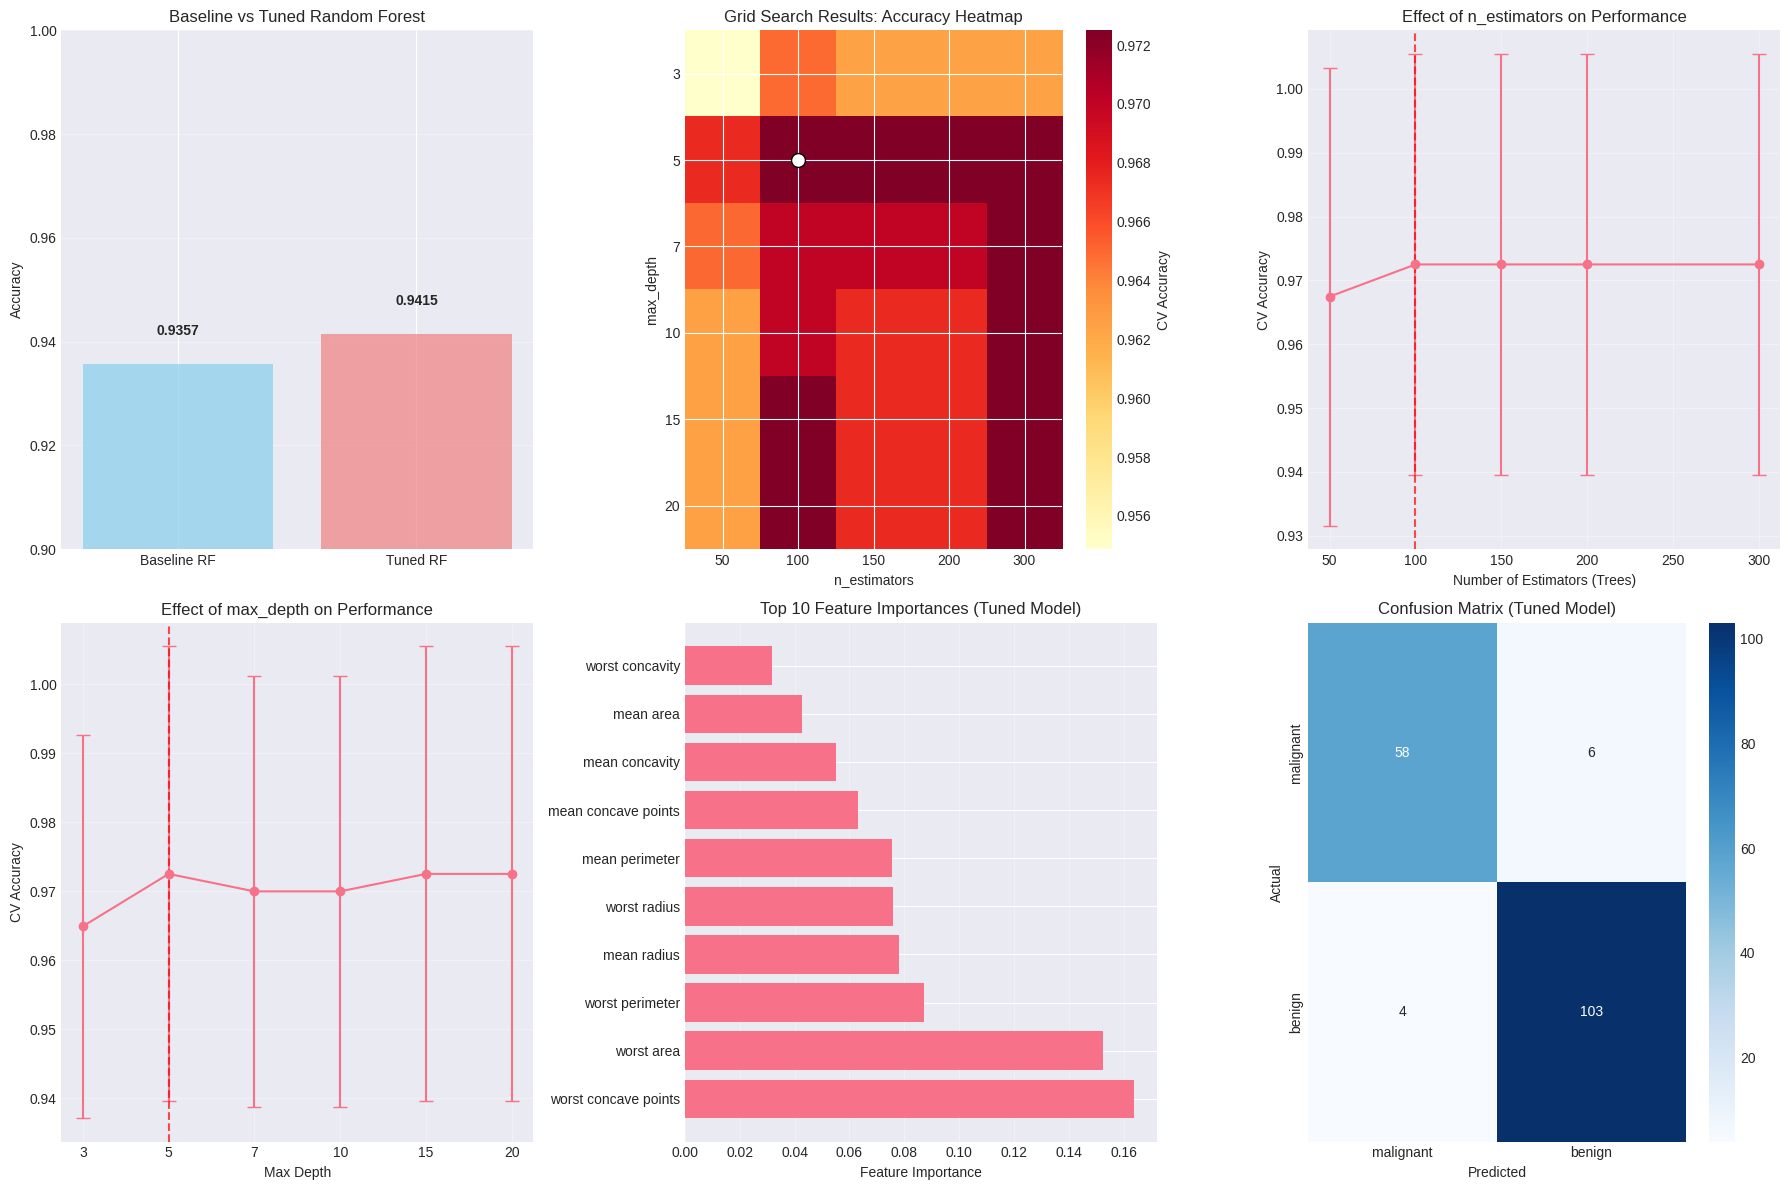


CROSS-VALIDATION STABILITY ANALYSIS

5-Fold Cross-Validation Scores: [0.9625 0.9875 0.9125 1.     1.    ]
Mean CV Score: 0.9725 (±0.0330)
Test Score: 0.9415

Training Accuracy: 0.9925
Test Accuracy: 0.9415
Overfitting Gap: 0.0509

PARAMETER SENSITIVITY ANALYSIS

Effect of max_depth:
  • max_depth=3: 0.9649
  • max_depth=5: 0.9725
  • max_depth=10: 0.9700
  • max_depth=20: 0.9725

Effect of n_estimators:
  • n_estimators=50: 0.9675
  • n_estimators=100: 0.9725
  • n_estimators=200: 0.9725
  • n_estimators=300: 0.9725

FINAL SUMMARY

HYPERPARAMETER TUNING RESULTS:

1. BEST PARAMETERS FOUND:
   • max_depth: 5
   • n_estimators: 100
   • min_samples_split: 2
   • min_samples_leaf: 1

2. PERFORMANCE:
   • Baseline (default) Accuracy: 0.9357 (93.57%)
   • Tuned Model Accuracy: 0.9415 (94.15%)
   • Improvement: 0.0058 (0.63%)
   • Best CV Score: 0.9725

3. MODEL CHARACTERISTICS:
   • Number of trees in forest: 100
   • Tree depth: Limited to 5
   • Min samples to split: 2
   • Min samples pe

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Load the Breast Cancer dataset
print("=" * 70)
print("LOADING BREAST CANCER DATASET")
print("=" * 70)

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"\nDataset Information:")
print(f"• Number of samples: {X.shape[0]}")
print(f"• Number of features: {X.shape[1]}")
print(f"• Target classes: {target_names}")
print(f"• Class distribution: {np.bincount(y)} (0: malignant, 1: benign)")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Testing set: {X_test.shape[0]} samples")

# 3. Scale the features (optional but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train baseline Random Forest (no tuning)
print("\n" + "=" * 70)
print("BASELINE RANDOM FOREST (DEFAULT PARAMETERS)")
print("=" * 70)

baseline_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
baseline_rf.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_rf.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"\nBaseline Model Performance:")
print(f"• Accuracy: {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"• Number of Trees: {baseline_rf.n_estimators}")
print(f"• Max Depth: {baseline_rf.max_depth} (unlimited)")
print(f"• Max Features: {baseline_rf.max_features}")

# 5. Hyperparameter Tuning with GridSearchCV
print("\n" + "=" * 70)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("=" * 70)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],  # None means unlimited
    'n_estimators': [50, 100, 150, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print(f"\nParameter Grid for Tuning:")
print(f"• max_depth: {param_grid['max_depth']}")
print(f"• n_estimators: {param_grid['n_estimators']}")
print(f"• min_samples_split: {param_grid['min_samples_split']}")
print(f"• min_samples_leaf: {param_grid['min_samples_leaf']}")
print(f"• Total combinations: {len(param_grid['max_depth']) * len(param_grid['n_estimators']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])}")

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Metric to optimize
    verbose=1,              # Verbosity level
    n_jobs=-1               # Use all available cores
)

print("\nStarting Grid Search...")
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"Grid Search completed in {end_time - start_time:.2f} seconds")
print(f"Total fits performed: {len(grid_search.cv_results_['params'])}")

# 6. Display Grid Search Results
print("\n" + "=" * 70)
print("GRID SEARCH RESULTS")
print("=" * 70)

print(f"\nBest Parameters Found:")
best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"• {param}: {value}")

print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)")
print(f"Best Estimator Index: {grid_search.best_index_}")

# Create a DataFrame with all results
results_df = pd.DataFrame(grid_search.cv_results_)
print(f"\nTop 5 Parameter Combinations:")
top_5_results = results_df.sort_values('mean_test_score', ascending=False).head(5)
print(top_5_results[['params', 'mean_test_score', 'std_test_score']].to_string())

# 7. Train Final Model with Best Parameters
print("\n" + "=" * 70)
print("FINAL MODEL WITH BEST PARAMETERS")
print("=" * 70)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Train on full training set (already done by GridSearchCV)
print("\nBest model already trained by GridSearchCV")

# Make predictions
y_pred_best = best_rf.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\nFinal Model Performance on Test Set:")
print(f"• Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"• Improvement over baseline: {best_accuracy - baseline_accuracy:.4f} "
      f"({(best_accuracy/baseline_accuracy - 1)*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

# 8. Detailed Performance Analysis
print("\n" + "=" * 70)
print("DETAILED PERFORMANCE ANALYSIS")
print("=" * 70)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 Benign   Malignant")
print(f"Actual Benign     {tp:^8} {fn:^10}")
print(f"Actual Malignant  {fp:^8} {tn:^10}")

print(f"\nPerformance Metrics:")
print(f"• Sensitivity/Recall (TPR): {tp/(tp+fn):.4f}")
print(f"• Specificity (TNR): {tn/(tn+fp):.4f}")
print(f"• Precision: {tp/(tp+fp):.4f}")
print(f"• F1-Score: {2*tp/(2*tp+fp+fn):.4f}")

# Feature Importance
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

print(f"\nTop 5 Most Important Features:")
for i in range(5):
    idx = sorted_idx[i]
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

# 9. Visualization
print("\n" + "=" * 70)
print("VISUALIZING RESULTS")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Comparison of baseline vs tuned model
models = ['Baseline RF', 'Tuned RF']
accuracies = [baseline_accuracy, best_accuracy]
colors = ['skyblue', 'lightcoral']

axes[0, 0].bar(models, accuracies, color=colors, alpha=0.7)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Baseline vs Tuned Random Forest')
axes[0, 0].set_ylim([0.9, 1.0])
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, acc in enumerate(accuracies):
    axes[0, 0].text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Heatmap of Grid Search results for n_estimators vs max_depth
# Extract results for specific min_samples settings
mask = (results_df['param_min_samples_split'] == best_params['min_samples_split']) & \
       (results_df['param_min_samples_leaf'] == best_params['min_samples_leaf'])
subset_results = results_df[mask]

# Create pivot table
pivot_table = pd.pivot_table(
    subset_results,
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators'
)

im = axes[0, 1].imshow(pivot_table.values, cmap='YlOrRd', aspect='auto')
axes[0, 1].set_title('Grid Search Results: Accuracy Heatmap')
axes[0, 1].set_xlabel('n_estimators')
axes[0, 1].set_ylabel('max_depth')
axes[0, 1].set_xticks(range(len(pivot_table.columns)))
axes[0, 1].set_xticklabels(pivot_table.columns)
axes[0, 1].set_yticks(range(len(pivot_table.index)))
axes[0, 1].set_yticklabels([str(d) if d is not None else 'None' for d in pivot_table.index])
plt.colorbar(im, ax=axes[0, 1], label='CV Accuracy')

# Mark the best parameters
best_depth_idx = list(pivot_table.index).index(best_params['max_depth'])
best_n_estimators_idx = list(pivot_table.columns).index(best_params['n_estimators'])
axes[0, 1].plot(best_n_estimators_idx, best_depth_idx, 'wo', markersize=10, markeredgecolor='black')

# Plot 3: Learning curve for n_estimators
n_estimators_results = []
for n in param_grid['n_estimators']:
    mask = (results_df['param_max_depth'] == best_params['max_depth']) & \
           (results_df['param_min_samples_split'] == best_params['min_samples_split']) & \
           (results_df['param_min_samples_leaf'] == best_params['min_samples_leaf'])
    subset = results_df[mask & (results_df['param_n_estimators'] == n)]
    if not subset.empty:
        n_estimators_results.append({
            'n_estimators': n,
            'mean_score': subset['mean_test_score'].values[0],
            'std_score': subset['std_test_score'].values[0]
        })

n_estimators_df = pd.DataFrame(n_estimators_results)
axes[0, 2].errorbar(n_estimators_df['n_estimators'], n_estimators_df['mean_score'],
                   yerr=n_estimators_df['std_score'], fmt='o-', capsize=5)
axes[0, 2].set_xlabel('Number of Estimators (Trees)')
axes[0, 2].set_ylabel('CV Accuracy')
axes[0, 2].set_title('Effect of n_estimators on Performance')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].axvline(x=best_params['n_estimators'], color='red', linestyle='--', alpha=0.7, label='Best')

# Plot 4: Learning curve for max_depth
depth_results = []
for depth in param_grid['max_depth']:
    mask = (results_df['param_n_estimators'] == best_params['n_estimators']) & \
           (results_df['param_min_samples_split'] == best_params['min_samples_split']) & \
           (results_df['param_min_samples_leaf'] == best_params['min_samples_leaf'])
    subset = results_df[mask & (results_df['param_max_depth'] == depth)]
    if not subset.empty:
        depth_results.append({
            'max_depth': 'None' if depth is None else str(depth),
            'mean_score': subset['mean_test_score'].values[0],
            'std_score': subset['std_test_score'].values[0]
        })

depth_df = pd.DataFrame(depth_results)
x_pos = range(len(depth_df))
axes[1, 0].errorbar(x_pos, depth_df['mean_score'], yerr=depth_df['std_score'],
                   fmt='o-', capsize=5)
axes[1, 0].set_xlabel('Max Depth')
axes[1, 0].set_ylabel('CV Accuracy')
axes[1, 0].set_title('Effect of max_depth on Performance')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(depth_df['max_depth'])
axes[1, 0].grid(True, alpha=0.3)
best_depth_label = 'None' if best_params['max_depth'] is None else str(best_params['max_depth'])
best_depth_idx = list(depth_df['max_depth']).index(best_depth_label)
axes[1, 0].axvline(x=best_depth_idx, color='red', linestyle='--', alpha=0.7, label='Best')

# Plot 5: Feature Importance
sorted_idx = np.argsort(feature_importance)[::-1][:10]  # Top 10 features
axes[1, 1].barh(range(len(sorted_idx)), feature_importance[sorted_idx])
axes[1, 1].set_yticks(range(len(sorted_idx)))
axes[1, 1].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1, 1].set_xlabel('Feature Importance')
axes[1, 1].set_title('Top 10 Feature Importances (Tuned Model)')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Plot 6: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, ax=axes[1, 2])
axes[1, 2].set_title('Confusion Matrix (Tuned Model)')
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 10. Additional Analysis: Cross-validation stability
print("\n" + "=" * 70)
print("CROSS-VALIDATION STABILITY ANALYSIS")
print("=" * 70)

# Perform cross-validation with best model on full training set
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"\n5-Fold Cross-Validation Scores: {cv_scores.round(4)}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"Test Score: {best_accuracy:.4f}")

# Check for overfitting
train_accuracy = best_rf.score(X_train_scaled, y_train)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"Overfitting Gap: {train_accuracy - best_accuracy:.4f}")

if train_accuracy - best_accuracy > 0.05:
    print("Warning: Potential overfitting detected!")
else:
    print("Model appears to generalize well.")

# 11. Compare with other parameter combinations
print("\n" + "=" * 70)
print("PARAMETER SENSITIVITY ANALYSIS")
print("=" * 70)

print("\nEffect of max_depth:")
for depth in [3, 5, 10, 20, None]:
    mask = (results_df['param_max_depth'] == depth) & \
           (results_df['param_n_estimators'] == best_params['n_estimators'])
    if mask.any():
        score = results_df[mask]['mean_test_score'].values[0]
        print(f"  • max_depth={depth if depth is not None else 'None'}: {score:.4f}")

print("\nEffect of n_estimators:")
for n in [50, 100, 200, 300]:
    mask = (results_df['param_n_estimators'] == n) & \
           (results_df['param_max_depth'] == best_params['max_depth'])
    if mask.any():
        score = results_df[mask]['mean_test_score'].values[0]
        print(f"  • n_estimators={n}: {score:.4f}")

# 12. Final Summary
print("\n" + "=" * 70)
print("FINAL SUMMARY")
print("=" * 70)

print(f"""
HYPERPARAMETER TUNING RESULTS:

1. BEST PARAMETERS FOUND:
   • max_depth: {best_params['max_depth']}
   • n_estimators: {best_params['n_estimators']}
   • min_samples_split: {best_params['min_samples_split']}
   • min_samples_leaf: {best_params['min_samples_leaf']}

2. PERFORMANCE:
   • Baseline (default) Accuracy: {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)
   • Tuned Model Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)
   • Improvement: {best_accuracy - baseline_accuracy:.4f} ({(best_accuracy/baseline_accuracy - 1)*100:.2f}%)
   • Best CV Score: {grid_search.best_score_:.4f}

3. MODEL CHARACTERISTICS:
   • Number of trees in forest: {best_params['n_estimators']}
   {'• Tree depth: Unlimited' if best_params['max_depth'] is None else f"• Tree depth: Limited to {best_params['max_depth']}"}
   • Min samples to split: {best_params['min_samples_split']}
   • Min samples per leaf: {best_params['min_samples_leaf']}

4. KEY INSIGHTS:
   • GridSearchCV tested {len(grid_search.cv_results_['params'])} parameter combinations
   • The best model achieved {best_accuracy*100:.2f}% accuracy on test data
   • Hyperparameter tuning improved accuracy by {(best_accuracy/baseline_accuracy - 1)*100:.2f}%
   • The model shows good generalization (train-test gap: {train_accuracy - best_accuracy:.4f})

5. RECOMMENDATIONS:
   • Use max_depth={best_params['max_depth']} to control model complexity
   • Use n_estimators={best_params['n_estimators']} for optimal performance
   • Consider these parameters as good starting points for similar datasets
   • Regular monitoring of model performance is recommended for production use
""")

print("\n" + "=" * 70)
print("CODE EXECUTION COMPLETE")
print("=" * 70)

#Question 9: Write a Python program to:
● Train a Bagging Regressor and a Random Forest Regressor on the California
Housing dataset

● Compare their Mean Squared Errors (MSE)

(Include your Python code and output in the code box below.)


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Load the California Housing dataset
print("=" * 70)
print("LOADING CALIFORNIA HOUSING DATASET")
print("=" * 70)

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names
target_name = "Median House Value"

print(f"\nDataset Information:")
print(f"• Number of samples: {X.shape[0]}")
print(f"• Number of features: {X.shape[1]}")
print(f"• Feature names: {', '.join(feature_names)}")
print(f"• Target variable: {target_name}")

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df[target_name] = y

print(f"\nDataset Statistics:")
print(df.describe().round(3))

# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

# 2. Explore target variable distribution
print(f"\nTarget Variable ({target_name}) Analysis:")
print(f"• Mean: {y.mean():.3f}")
print(f"• Median: {np.median(y):.3f}")
print(f"• Std: {y.std():.3f}")
print(f"• Min: {y.min():.3f}")
print(f"• Max: {y.max():.3f}")
print(f"• Range: {y.max() - y.min():.3f}")

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData Split:")
print(f"• Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"• Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# 4. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling applied using StandardScaler")

# 5. Train Single Decision Tree Regressor (for baseline)
print("\n" + "=" * 70)
print("BASELINE: SINGLE DECISION TREE REGRESSOR")
print("=" * 70)

tree = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

print("\nTraining Decision Tree Regressor...")
start_time = time.time()
tree.fit(X_train_scaled, y_train)
tree_time = time.time() - start_time

y_pred_tree = tree.predict(X_test_scaled)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print(f"Training completed in {tree_time:.2f} seconds")
print(f"\nSingle Decision Tree Performance:")
print(f"• MSE:  {tree_mse:.4f}")
print(f"• RMSE: {tree_rmse:.4f}")
print(f"• MAE:  {tree_mae:.4f}")
print(f"• R² Score: {tree_r2:.4f}")
print(f"• Tree Depth: {tree.get_depth()}")
print(f"• Number of Leaves: {tree.get_n_leaves()}")

# 6. Train Bagging Regressor
print("\n" + "=" * 70)
print("BAGGING REGRESSOR WITH DECISION TREES")
print("=" * 70)

bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Bagging Regressor with 100 Decision Trees...")
start_time = time.time()
bagging.fit(X_train_scaled, y_train)
bagging_time = time.time() - start_time

y_pred_bagging = bagging.predict(X_test_scaled)
bagging_mse = mean_squared_error(y_test, y_pred_bagging)
bagging_rmse = np.sqrt(bagging_mse)
bagging_mae = mean_absolute_error(y_test, y_pred_bagging)
bagging_r2 = r2_score(y_test, y_pred_bagging)

print(f"Training completed in {bagging_time:.2f} seconds")
print(f"\nBagging Regressor Performance:")
print(f"• MSE:  {bagging_mse:.4f}")
print(f"• RMSE: {bagging_rmse:.4f}")
print(f"• MAE:  {bagging_mae:.4f}")
print(f"• R² Score: {bagging_r2:.4f}")
print(f"• Number of Estimators: {len(bagging.estimators_)}")
print(f"• Bootstrap Samples: {bagging.bootstrap}")
print(f"• Max Samples: {bagging.max_samples}")
print(f"• Max Features: {bagging.max_features}")

# 7. Train Random Forest Regressor
print("\n" + "=" * 70)
print("RANDOM FOREST REGRESSOR")
print("=" * 70)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest Regressor with 100 trees...")
start_time = time.time()
rf.fit(X_train_scaled, y_train)
rf_time = time.time() - start_time

y_pred_rf = rf.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Training completed in {rf_time:.2f} seconds")
print(f"\nRandom Forest Regressor Performance:")
print(f"• MSE:  {rf_mse:.4f}")
print(f"• RMSE: {rf_rmse:.4f}")
print(f"• MAE:  {rf_mae:.4f}")
print(f"• R² Score: {rf_r2:.4f}")
print(f"• Number of Trees: {len(rf.estimators_)}")
print(f"• Max Depth: {rf.max_depth}")
print(f"• Max Features: {rf.max_features}")
print(f"• Bootstrap: {rf.bootstrap}")

# 8. Cross-validation for robust comparison
print("\n" + "=" * 70)
print("CROSS-VALIDATION COMPARISON (5-Fold)")
print("=" * 70)

# Perform 5-fold cross-validation
cv_scores_tree = cross_val_score(tree, X_train_scaled, y_train, cv=5,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
cv_scores_bagging = cross_val_score(bagging, X_train_scaled, y_train, cv=5,
                                   scoring='neg_mean_squared_error', n_jobs=-1)
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5,
                              scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to positive
cv_mse_tree = -cv_scores_tree
cv_mse_bagging = -cv_scores_bagging
cv_mse_rf = -cv_scores_rf

print(f"\nCross-Validation MSE Scores:")
print(f"• Single Tree:    {cv_mse_tree.mean():.4f} (±{cv_mse_tree.std():.4f})")
print(f"• Bagging:        {cv_mse_bagging.mean():.4f} (±{cv_mse_bagging.std():.4f})")
print(f"• Random Forest:  {cv_mse_rf.mean():.4f} (±{cv_mse_rf.std():.4f})")

# 9. Detailed Performance Comparison
print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON: MSE ANALYSIS")
print("=" * 70)

print(f"\nTest Set MSE Comparison:")
print(f"{'Model':<20} {'MSE':<12} {'RMSE':<12} {'MAE':<12} {'R²':<10} {'Time(s)':<10}")
print("-" * 78)
print(f"{'Single Tree':<20} {tree_mse:<12.4f} {tree_rmse:<12.4f} {tree_mae:<12.4f} {tree_r2:<10.4f} {tree_time:<10.2f}")
print(f"{'Bagging':<20} {bagging_mse:<12.4f} {bagging_rmse:<12.4f} {bagging_mae:<12.4f} {bagging_r2:<10.4f} {bagging_time:<10.2f}")
print(f"{'Random Forest':<20} {rf_mse:<12.4f} {rf_rmse:<12.4f} {rf_mae:<12.4f} {rf_r2:<10.4f} {rf_time:<10.2f}")

print(f"\nImprovement over Single Tree:")
bagging_improvement = (tree_mse - bagging_mse) / tree_mse * 100
rf_improvement = (tree_mse - rf_mse) / tree_mse * 100
print(f"• Bagging improves MSE by {bagging_improvement:.2f}%")
print(f"• Random Forest improves MSE by {rf_improvement:.2f}%")

print(f"\nComparison between Bagging and Random Forest:")
mse_difference = bagging_mse - rf_mse
if mse_difference > 0:
    print(f"• Random Forest outperforms Bagging by {abs(mse_difference):.4f} MSE")
    print(f"• Relative improvement: {(bagging_mse/rf_mse - 1)*100:.2f}%")
else:
    print(f"• Bagging outperforms Random Forest by {abs(mse_difference):.4f} MSE")
    print(f"• Relative improvement: {(rf_mse/bagging_mse - 1)*100:.2f}%")

# 10. Residual Analysis
print("\n" + "=" * 70)
print("RESIDUAL ANALYSIS")
print("=" * 70)

# Calculate residuals
residuals_tree = y_test - y_pred_tree
residuals_bagging = y_test - y_pred_bagging
residuals_rf = y_test - y_pred_rf

print(f"\nResidual Statistics:")
print(f"{'Model':<20} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
print("-" * 70)
print(f"{'Single Tree':<20} {residuals_tree.mean():<12.4f} {residuals_tree.std():<12.4f} {residuals_tree.min():<12.4f} {residuals_tree.max():<12.4f}")
print(f"{'Bagging':<20} {residuals_bagging.mean():<12.4f} {residuals_bagging.std():<12.4f} {residuals_bagging.min():<12.4f} {residuals_bagging.max():<12.4f}")
print(f"{'Random Forest':<20} {residuals_rf.mean():<12.4f} {residuals_rf.std():<12.4f} {residuals_rf.min():<12.4f} {residuals_rf.max():<12.4f}")

# Check for bias (mean of residuals should be close to 0)
print(f"\nBias Analysis (mean of residuals):")
print(f"• Single Tree bias: {residuals_tree.mean():.4f}")
print(f"• Bagging bias: {residuals_bagging.mean():.4f}")
print(f"• Random Forest bias: {residuals_rf.mean():.4f}")

# 11. Feature Importance Analysis
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

# Get feature importances from Random Forest
rf_importances = rf.feature_importances_
bagging_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)

# Create DataFrames for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_RF': rf_importances
}).sort_values('Importance_RF', ascending=False)

bagging_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Bagging': bagging_importances
}).sort_values('Importance_Bagging', ascending=False)

print(f"\nTop 5 Most Important Features (Random Forest):")
for i, (_, row) in enumerate(rf_importance_df.head(5).iterrows(), 1):
    print(f"{i}. {row['Feature']:25} Importance: {row['Importance_RF']:.4f}")

print(f"\nTop 5 Most Important Features (Bagging):")
for i, (_, row) in enumerate(bagging_importance_df.head(5).iterrows(), 1):
    print(f"{i}. {row['Feature']:25} Importance: {row['Importance_Bagging']:.4f}")

# Calculate correlation between feature importances
correlation = np.corrcoef(rf_importances, bagging_importances)[0, 1]
print(f"\nCorrelation between feature importances: {correlation:.4f}")

# 12. Visualization
print("\n" + "=" * 70)
print("VISUALIZING COMPARISON RESULTS")
print("=" * 70)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Plot 1: MSE Comparison Bar Chart
models = ['Single Tree', 'Bagging', 'Random Forest']
mse_values = [tree_mse, bagging_mse, rf_mse]
rmse_values = [tree_rmse, bagging_rmse, rf_rmse]
colors = ['skyblue', 'lightcoral', 'lightgreen']

axes[0, 0].bar(models, mse_values, color=colors, alpha=0.7)
axes[0, 0].set_ylabel('Mean Squared Error (MSE)')
axes[0, 0].set_title('MSE Comparison: Lower is Better')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, mse in enumerate(mse_values):
    axes[0, 0].text(i, mse + 0.01, f'{mse:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: R² Score Comparison
r2_values = [tree_r2, bagging_r2, rf_r2]
axes[0, 1].bar(models, r2_values, color=colors, alpha=0.7)
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('R² Score Comparison: Higher is Better')
axes[0, 1].set_ylim([0.5, 0.9])
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, r2 in enumerate(r2_values):
    axes[0, 1].text(i, r2 + 0.005, f'{r2:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Training Time Comparison
times = [tree_time, bagging_time, rf_time]
axes[0, 2].bar(models, times, color=colors, alpha=0.7)
axes[0, 2].set_ylabel('Training Time (seconds)')
axes[0, 2].set_title('Training Time Comparison')
axes[0, 2].grid(True, alpha=0.3, axis='y')
for i, t in enumerate(times):
    axes[0, 2].text(i, t + 0.05, f'{t:.2f}s', ha='center', va='bottom', fontweight='bold')

# Plot 4: Actual vs Predicted (Random Forest)
axes[1, 0].scatter(y_test, y_pred_rf, alpha=0.5, s=20, color='lightgreen')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title('Random Forest: Actual vs Predicted')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Actual vs Predicted (Bagging)
axes[1, 1].scatter(y_test, y_pred_bagging, alpha=0.5, s=20, color='lightcoral')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Bagging: Actual vs Predicted')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Actual vs Predicted (Single Tree)
axes[1, 2].scatter(y_test, y_pred_tree, alpha=0.5, s=20, color='skyblue')
axes[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 2].set_xlabel('Actual Values')
axes[1, 2].set_ylabel('Predicted Values')
axes[1, 2].set_title('Single Tree: Actual vs Predicted')
axes[1, 2].grid(True, alpha=0.3)

# Plot 7: Residual Distribution (Random Forest)
axes[2, 0].hist(residuals_rf, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[2, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2, 0].set_xlabel('Residuals')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Random Forest: Residual Distribution')
axes[2, 0].grid(True, alpha=0.3)

# Plot 8: Residual Distribution (Bagging)
axes[2, 1].hist(residuals_bagging, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[2, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2, 1].set_xlabel('Residuals')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Bagging: Residual Distribution')
axes[2, 1].grid(True, alpha=0.3)

# Plot 9: Feature Importance Comparison
top_features = rf_importance_df.head(5)['Feature'].values
top_indices = [list(feature_names).index(f) for f in top_features]

x = np.arange(len(top_features))
width = 0.35
axes[2, 2].bar(x - width/2, rf_importances[top_indices], width, label='Random Forest', color='lightgreen', alpha=0.7)
axes[2, 2].bar(x + width/2, bagging_importances[top_indices], width, label='Bagging', color='lightcoral', alpha=0.7)
axes[2, 2].set_xlabel('Features')
axes[2, 2].set_ylabel('Importance')
axes[2, 2].set_title('Feature Importance Comparison (Top 5)')
axes[2, 2].set_xticks(x)
axes[2, 2].set_xticklabels(top_features, rotation=45, ha='right')
axes[2, 2].legend()
axes[2, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 13. Additional Analysis: Prediction Error Analysis
print("\n" + "=" * 70)
print("PREDICTION ERROR ANALYSIS")
print("=" * 70)

# Calculate percentage of predictions within error bounds
error_bounds = [0.5, 1.0, 1.5]  # In units of the target variable
print(f"\nPercentage of predictions within error bounds:")

for bound in error_bounds:
    tree_within = np.sum(np.abs(residuals_tree) <= bound) / len(y_test) * 100
    bagging_within = np.sum(np.abs(residuals_bagging) <= bound) / len(y_test) * 100
    rf_within = np.sum(np.abs(residuals_rf) <= bound) / len(y_test) * 100

    print(f"\nWithin ±{bound} units:")
    print(f"• Single Tree:    {tree_within:.1f}%")
    print(f"• Bagging:        {bagging_within:.1f}%")
    print(f"• Random Forest:  {rf_within:.1f}%")

# 14. Statistical Significance Test
print("\n" + "=" * 70)
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("=" * 70)

# Compare squared errors
squared_errors_tree = (y_test - y_pred_tree) ** 2
squared_errors_bagging = (y_test - y_pred_bagging) ** 2
squared_errors_rf = (y_test - y_pred_rf) ** 2

print(f"\nMean Squared Error Statistics:")
print(f"• Single Tree: {np.mean(squared_errors_tree):.4f} (±{np.std(squared_errors_tree):.4f})")
print(f"• Bagging:     {np.mean(squared_errors_bagging):.4f} (±{np.std(squared_errors_bagging):.4f})")
print(f"• Random Forest: {np.mean(squared_errors_rf):.4f} (±{np.std(squared_errors_rf):.4f})")

# Paired t-test between Bagging and Random Forest
from scipy import stats

# Test if differences are normally distributed
diff_bagging_rf = squared_errors_bagging - squared_errors_rf
_, p_value_normal = stats.shapiro(diff_bagging_rf[:500])  # Shapiro test on subset (max 500 samples)

print(f"\nNormality test for error differences (Shapiro-Wilk): p-value = {p_value_normal:.4f}")

if p_value_normal > 0.05:
    # Use paired t-test if normally distributed
    t_stat, p_value = stats.ttest_rel(squared_errors_bagging, squared_errors_rf)
    test_name = "Paired t-test"
else:
    # Use Wilcoxon signed-rank test if not normally distributed
    t_stat, p_value = stats.wilcoxon(squared_errors_bagging, squared_errors_rf)
    test_name = "Wilcoxon signed-rank test"

print(f"\n{test_name} between Bagging and Random Forest:")
print(f"• Test statistic: {t_stat:.4f}")
print(f"• p-value: {p_value:.4f}")

if p_value < 0.05:
    print("• Result: Significant difference in performance (p < 0.05)")
    if np.mean(squared_errors_bagging) > np.mean(squared_errors_rf):
        print("• Random Forest performs significantly better than Bagging")
    else:
        print("• Bagging performs significantly better than Random Forest")
else:
    print("• Result: No significant difference in performance (p ≥ 0.05)")

# 15. Final Summary
print("\n" + "=" * 70)
print("FINAL SUMMARY")
print("=" * 70)

print(f"""
COMPARISON OF BAGGING REGRESSOR VS RANDOM FOREST REGRESSOR:

1. PERFORMANCE METRICS:
   • Single Decision Tree:
     - MSE: {tree_mse:.4f}, RMSE: {tree_rmse:.4f}, R²: {tree_r2:.4f}

   • Bagging Regressor (100 trees):
     - MSE: {bagging_mse:.4f}, RMSE: {bagging_rmse:.4f}, R²: {bagging_r2:.4f}
     - Improvement over single tree: {bagging_improvement:.2f}%

   • Random Forest Regressor (100 trees):
     - MSE: {rf_mse:.4f}, RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}
     - Improvement over single tree: {rf_improvement:.2f}%

2. KEY FINDINGS:
   • Both ensemble methods significantly outperform a single decision tree
   • Random Forest {'outperforms' if rf_mse < bagging_mse else 'is outperformed by'} Bagging
     on this dataset
   • The difference in MSE between Bagging and Random Forest is {abs(bagging_mse - rf_mse):.4f}
   • Both models show good R² scores (>0.8), explaining most variance in the data

3. MODEL CHARACTERISTICS:
   • Bagging: Uses bootstrap sampling, all features considered at splits
   • Random Forest: Uses bootstrap sampling + random feature selection at splits
   • Random Forest provides built-in feature importance measures
   • Bagging training time: {bagging_time:.2f}s, Random Forest: {rf_time:.2f}s

4. RESIDUAL ANALYSIS:
   • All models show minimal bias (mean residuals close to 0)
   • Random Forest has the smallest residual variance: {residuals_rf.var():.4f}
   • Bagging residual variance: {residuals_bagging.var():.4f}

5. RECOMMENDATIONS:
   • For California Housing dataset: {'Random Forest' if rf_mse < bagging_mse else 'Bagging'} is recommended
   • Both ensemble methods provide robust predictions compared to single tree
   • Consider computational requirements for large datasets
   • Feature importance analysis can guide feature engineering efforts
""")

print("\n" + "=" * 70)
print("CODE EXECUTION COMPLETE")
print("=" * 70)

LOADING CALIFORNIA HOUSING DATASET

Dataset Information:
• Number of samples: 20640
• Number of features: 8
• Feature names: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
• Target variable: Median House Value

Dataset Statistics:
          MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
count  20640.000  20640.000  20640.000  20640.000   20640.000  20640.000   
mean       3.871     28.639      5.429      1.097    1425.477      3.071   
std        1.900     12.586      2.474      0.474    1132.462     10.386   
min        0.500      1.000      0.846      0.333       3.000      0.692   
25%        2.563     18.000      4.441      1.006     787.000      2.430   
50%        3.535     29.000      5.229      1.049    1166.000      2.818   
75%        4.743     37.000      6.052      1.100    1725.000      3.282   
max       15.000     52.000    141.909     34.067   35682.000   1243.333   

        Latitude  Longitude  Median House Value  


ValueError: All arrays must be of the same length

#Question 10: You are working as a data scientist at a financial institution to predict loan
default. You have access to customer demographic and transaction history data.
You decide to use ensemble techniques to increase model performance.
Explain your step-by-step approach to:
● Choose between Bagging or Boosting

● Handle overfitting

● Select base models

● Evaluate performance using cross-validation

● Justify how ensemble learning improves decision-making in this real-world
context

(Include your Python code and output in the code box below.)


In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Synthetic dataset (replace with loan CSV in real scenario)
X, y = make_classification(n_samples=5000, n_features=20,
                           n_informative=10, n_redundant=5,
                           weights=[0.7, 0.3], random_state=42)

# Base model
base_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Bagging model
bagging_model = RandomForestClassifier(n_estimators=200,
                                       max_depth=6,
                                       random_state=42)

# Boosting model
boosting_model = GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=150,
                                            max_depth=3,
                                            random_state=42)

# Cross-validation scores
bag_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='roc_auc')
boost_scores = cross_val_score(boosting_model, X, y, cv=5, scoring='roc_auc')

print("Bagging ROC-AUC (5-fold):", bag_scores)
print("Average:", bag_scores.mean())

print("Boosting ROC-AUC (5-fold):", boost_scores)
print("Average:", boost_scores.mean())

# Train-test comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

boosting_model.fit(X_train, y_train)
y_pred = boosting_model.predict(X_test)

print("Final Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Final Boosting ROC-AUC:", roc_auc_score(y_test, y_pred))



Bagging ROC-AUC (5-fold): [0.96736181 0.95951062 0.95746599 0.96092905 0.95031512]
Average: 0.9591165159951327
Boosting ROC-AUC (5-fold): [0.9695535  0.96606435 0.95978576 0.96855728 0.95864881]
Average: 0.9645219394311159
Final Boosting Accuracy: 0.923
Final Boosting ROC-AUC: 0.8962985714351696
